# Rental Bike Demand Prediction

## Context


Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
df_day=pd.read_csv('day.csv')
df_day.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hour=pd.read_csv('hour.csv')
df_hour.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


##### For exploratory data analysis, we will be creating a copy of df_day to perform data cleaning tasks without disturbing the actual dataframe.Using df_day dataframe to discover patterns, trends by day wise.For further hourly pattern analysis,we will use df_hour dataframe later.

## Exploratory Data Analysis

In [ ]:
df_day_ex=df_day.copy()

In [ ]:
df_day_ex.shape

(731, 16)

In [ ]:
df_day_ex['yr']=df_day_ex['yr'].map({0:'2011',1:'2012'})
df_day_ex['season'] = df_day_ex['season'].map({ 1: 'Winter', 2 : 'Spring',3:'Summer',4:'Fall'})
df_day_ex['weekday'] = df_day_ex['weekday'].map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})
df_day_ex['mnth']= df_day_ex['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
                   7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
df_day_ex['weathersit']= df_day_ex['weathersit'].map({1:'Clear',2:'Cloudy',3:'Light Rain and Snow',4:'Heavy Rain'})

Checking whether the mapping method is implemented with out any nan values.

In [ ]:
df_day_ex.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df_day_ex.rename(columns={"yr": "year", "mnth":"month","weathersit":"weather","temp":"temperature","atemp":"feeling temp","hum":"humidity","cnt":"count"},inplace=True)

Dropping off the columns dteday as it represents (year,month,date) where we have seperate columns and instant where it is index from the table.

In [ ]:
df_day_ex.drop(['dteday','instant'],axis=1,inplace=True)

In [ ]:
df_day_ex.head(5)

,season,year,month,holiday,weekday,workingday,weather,temperature,feeling temp,humidity,windspeed,casual,registered,count
0,Winter,2011,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,Winter,2011,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,Winter,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,Winter,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,Winter,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Now lets dive into EDA part.

In [ ]:
df_day_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season        731 non-null    object 
 1   year          731 non-null    object 
 2   month         731 non-null    object 
 3   holiday       731 non-null    int64  
 4   weekday       731 non-null    object 
 5   workingday    731 non-null    int64  
 6   weather       731 non-null    object 
 7   temperature   731 non-null    float64
 8   feeling temp  731 non-null    float64
 9   humidity      731 non-null    float64
 10  windspeed     731 non-null    float64
 11  casual        731 non-null    int64  
 12  registered    731 non-null    int64  
 13  count         731 non-null    int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 80.1+ KB


In [ ]:
df_day_ex.describe()

,holiday,workingday,temperature,feeling temp,humidity,windspeed,casual,registered,count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.028728,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,0.167155,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,0.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,0.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,0.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,1.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_day_ex.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday',
       'weather', 'temperature', 'feeling temp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

### How is the target variable 'count' is distributed?

<ipython-input-159-87e36ef4464e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_day_ex['count'])


<Axes: xlabel='count', ylabel='Density'>

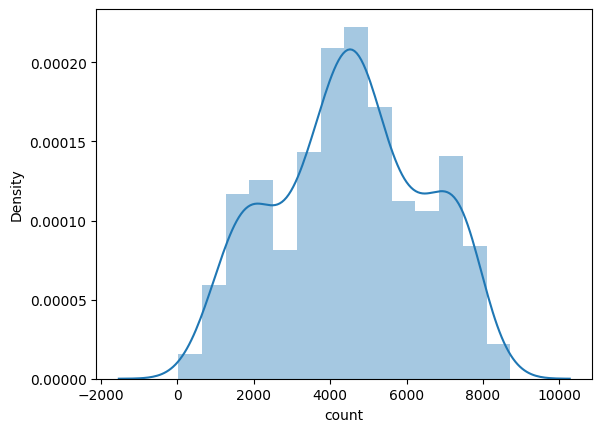

In [ ]:
sns.distplot(df_day_ex['count'])

From the above graph, the distribution is bell curve with stepwise on each side. Performing transformations on these to convert it into normal distribution.  

### Visualizing the Categorical variables to target variable

### How does renting bikes varies across season?

<Axes: xlabel='season', ylabel='count'>

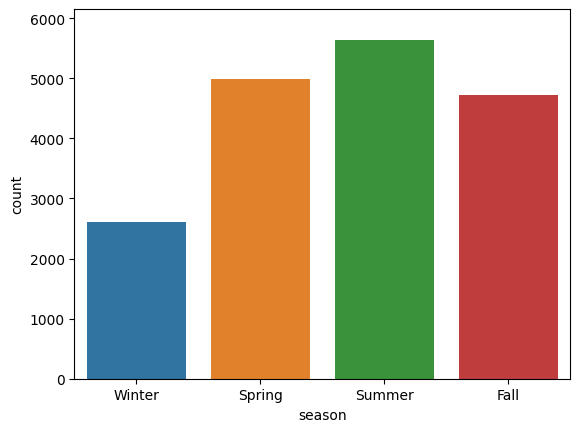

In [ ]:
sns.barplot(x='season',y='count',data=df_day_ex,errwidth=0)

From the above graph, we observe that on an average bikes were rented more in summer season followed by spring and fall season. Winter season is the least in terms of renting a bike.

### Is there any growth in renting bikes from 2011 to 2012?

[Text(0, 0, '3405.76'), Text(0, 0, '5599.93')]

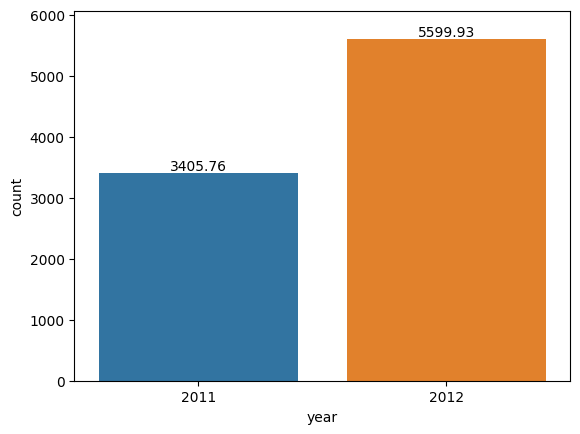

In [ ]:
ax = sns.barplot(x='year',y='count',data=df_day_ex,errwidth=0)
ax.bar_label(ax.containers[0])

There was an increase of 64% in average of renting bikes from 2011 to 2012. By this we can say the usage of bikes renting was increasing.  

### How is the usage of renting bikes in a week?

[Text(0, 0, '4338.12'),
 Text(0, 0, '4510.66'),
 Text(0, 0, '4548.54'),
 Text(0, 0, '4667.26'),
 Text(0, 0, '4690.29'),
 Text(0, 0, '4550.54'),
 Text(0, 0, '4228.83')]

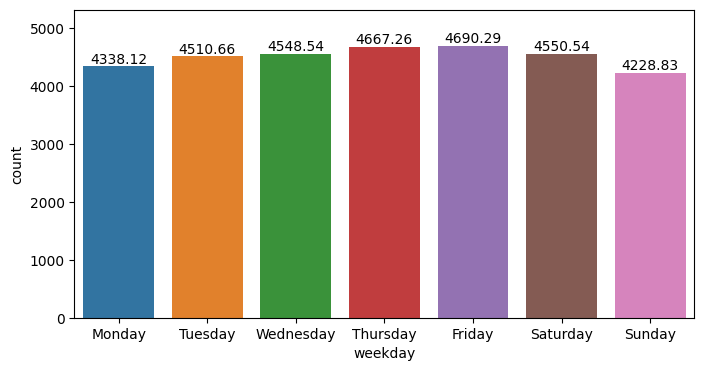

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x='weekday',y='count',data=df_day_ex,errwidth=0,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
ax.bar_label(ax.containers[0])

Renting bikes on Thursday and Friday averaging above 4,600's and slightly higher than other weekdays. It is also observed that renting on weekdays is higher than weekends.

<Axes: xlabel='weekday', ylabel='count'>

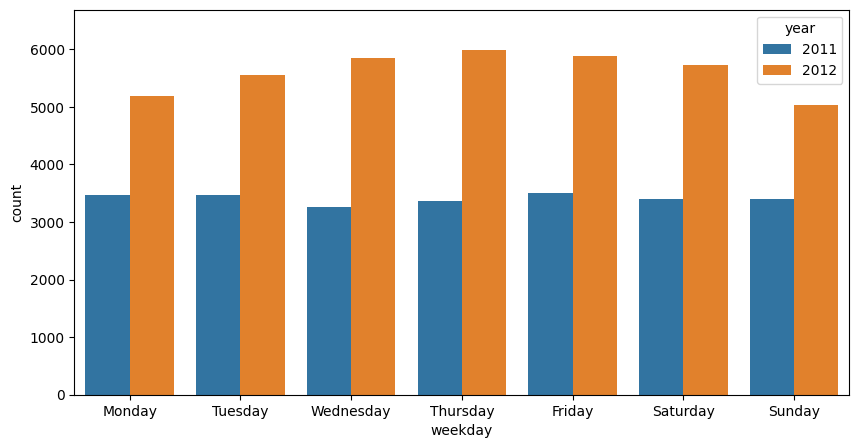

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='weekday',y='count',hue='year',data=df_day_ex,errwidth=0,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

There was increase in usage of bikes from 2011 to 2012 on everyday.

### How were bikes rented in each month?

<Axes: xlabel='month', ylabel='count'>

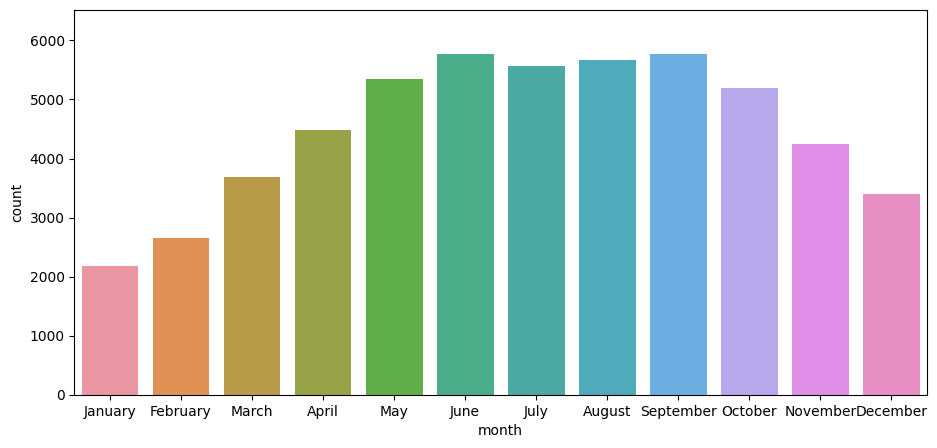

In [ ]:
plt.figure(figsize=(11,5))
sns.barplot(x='month',y='count',data=df_day_ex,errwidth=0)

The renting bikes averaging in june, july, august months were higher than other months except september because of the various reasons like summer season as the temperatures are warm, clear sky, holidays, etc. Though september comes under fall season, the weather and temperatures were similar to summer months.

### Does the holidays and weekends affect in renting bikes?

Text(0, 0.5, '')

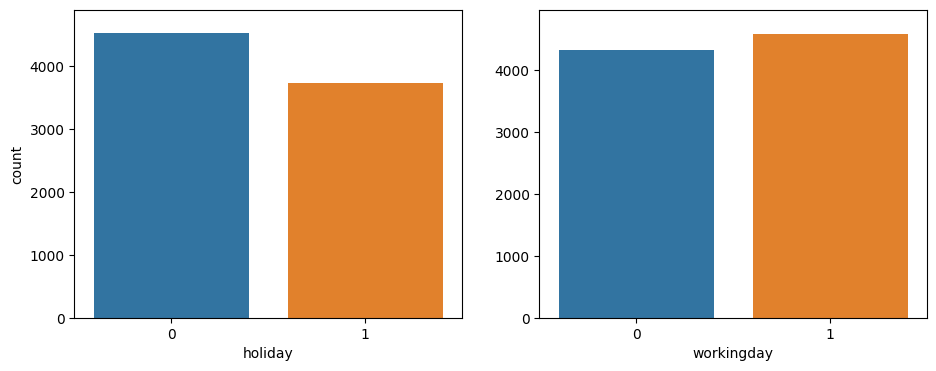

In [ ]:
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
sns.barplot(x='holiday',y='count',data=df_day_ex,errwidth=0)

plt.subplot(1,2,2)
sns.barplot(x='workingday',y='count',data=df_day_ex,errwidth=0)
plt.ylabel('')


The both graphs are similar in a way that, on a working day the usage is higher than weekends, holidays etc. So we can say that majority of the users are job holders, working people who commute to their work place on bikes.

### How does the weather impact the usage?

<Axes: xlabel='weather', ylabel='count'>

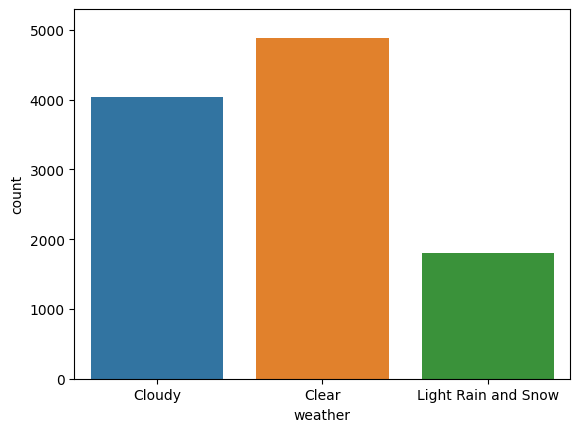

In [ ]:
sns.barplot(data=df_day_ex, x="weather", y="count",errwidth=0)

Users prefer the bikes on a clear weather as it is easy to ride in the warm, clear sky than compared to cloudy and light rain as it not a good option to ride on these days due to poor visibility of the road leads to danger situations.

### Visualizing the numerical variables on target variable

<Axes: xlabel='temperature', ylabel='count'>

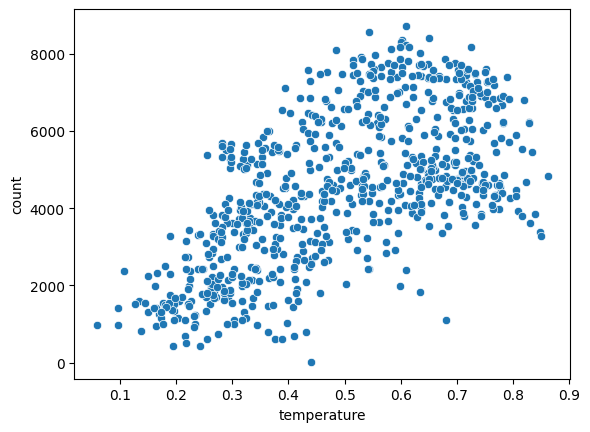

In [ ]:
sns.scatterplot(data=df_day_ex, x="temperature", y="count")

We can observe there is a linear relationship between the temperature and count of bikes usage. The usage of rental bikes increase when the temperature increases.

<Axes: xlabel='windspeed', ylabel='count'>

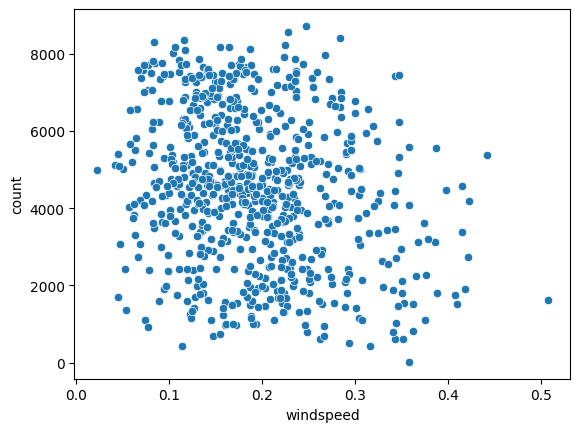

In [ ]:
sns.scatterplot(data=df_day_ex, x="windspeed", y="count")

It is clearly evident that when the windspeed is high, people do not prefer in renting the bikes as it become very hard for the users to pedal in these tougher situations.

### Usage of rental bikes in 24-hrs.

<Axes: xlabel='hr', ylabel='cnt'>

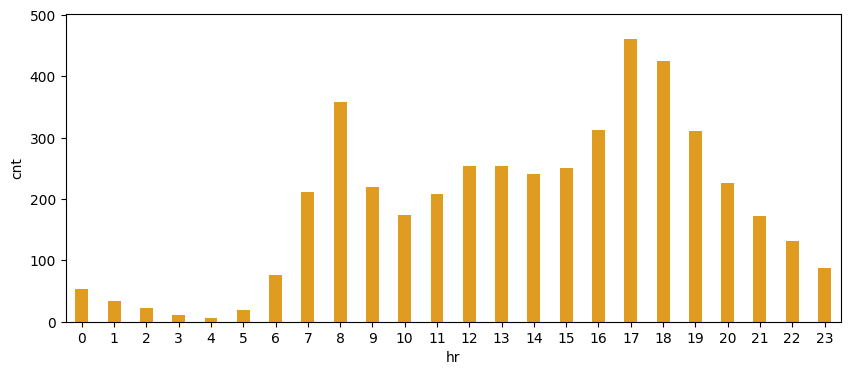

In [ ]:
plt.figure(figsize=(10,4))
sns.barplot(x='hr',y='cnt',data=df_hour,errwidth=0,color='orange',width=0.4)

We observe that the most of the bookings happened at 5:00 PM - 6:00 PM indicates that people after work tends to go home bikes. We can complete constrast of bookings during the hours from midnight 12:00 AM to 4:00 AM.

## Exploratory Data Analysis Summary

After exploring the rental bikes dataset, we have discovered hidden patterns, trends, how the variables are effecting the count of rental bikes usage, how are the independent variables are correlated to dependent variables.
The following are the summary points after analyzing the data.

1. Rental bikes usage were more in summer season followed by spring, fall and winter.
2. There was an increase of 64% in rental bikes demand from 2011 to 2012.
3. In summer months (June,July, August) rental bikes were highly used than other months.
4. There was more demand on working day than on holidays and weekends, from this we can also say that majority of the users were working people than casual users.
5. Simialr to point 4, the usage was more on weekdays than weekends.
6. There was a linear relationship between the temperature and count of rental bikes use. The higher the temperatures the higher the demand.
7. People prefer more on clear sky and warm day temperature to ride a bike.
8. It becomes difficult to ride when the windspeed is high, so is the shows the users dont show any interest in renting on those specific days.

## Future Outcomes

1. Preprocessing the data by converting the categorical variables into numrical variables.
2. Performing various techniques to handle the outliers asscoaited with.
3. Checking the multi-collinearity of the independent variables.
4. Selecting the prominent features for the Machine Learning modelling.
5. Implement various ML algorithms and calcualting the scores.
6. Comparing the scores and selecting the best performing model.